# Lab 3 - Plotting, šum i uklanjanje šuma

Ove laboratorijske vježbe se rješavaju u Google Colabu i spremaju na GitHub repozitorij koji je povezan na GitHub Classroom.

## Kako riješiti zadatke?

1. Prihvatite zadatak putem Google Classroom linka koji ćete dobiti. Google Classroom će kreirati repozitorij na vašem računu.
2. Uđite u novokreiran repozitorij na vašem računu u kliknite na **.ipynb** datoteku, zatim kliknite **Open in Colab**.
3. Zadatke rješavate u Google Colabu.

## Kako spremiti (predati) zadatke?

1. Unutar **Google Colaba** kliknite na **Open settings** kotačić u gornjem desnom kutu.
2. Kliknite na **GitHub** tab i odaberite kvačicu za **Access private repositories and organizations**.
3. Otvorit će se novi prozor da dodate pristup GitHubu. Kod **ferit-osirv** kliknite **Grant**.  
4. Spremite i izađite iz postavki.


5. Kliknite na **File > Save a copy in GitHub**.
6. Odaberite kreiran repozitorij labosa **koji uključuje vaše ime**.

> *Napomena:* Korake 1-4 morate napraviti samo prvi put.

## Kopiranje datoteka iz GitHub repozitorija

Za izradu vježbi bit će vam potrebne slike i druge datoteke koje će se nalaziti u GitHub repozitoriju vježbe. Ovakva komanda će biti dostupna u notebooku svake vježbe. Ona će kopirati datoteke s GitHuba u Google Colab okruženje.

**Ovu komandu je potrebno pokrenuti prije nego što krenete raditi svaku vježbu.**

In [1]:
!rm -rf clone && git clone https://github.com/ferit-osirv/lab3 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), done.


**Google Colab će povremeno obrisati sve datoteke.** Tako da će možda biti potrebno ponovno pokrenuti ovu komandu između dvije sesije. Ako dobivate greške da datoteke ne postoje, probajte ponovno pokrenuti gornju komandu.

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Uvod u Matplotlib

Matplotlib je vjerojatno najčešće korišten Python paket za vizualizaciju 2D
grafike. Ovaj paket omogućuje i brz način vizualizacije podataka iz Pythona, a
isto tako i kreiranje kvalitetnih slika u velikom broju različitih formata.  

` matplotlib.pyplot ` je kolekcija funkcija koja omogućuje matplotlibu
iscrtavanje slično kao u MATLAB-u. Tako da će oni koji su imali do sada
iskustva s grafovima u MATLAB-u se moći vrlo brzo priviknuti. 

` matplotlib.pyplot ` je _stateful_, što znači da pamti stanje trenutnog grafa,
te su sve naredbe usmjerene prema trenutnom grafu. 

### Jednostavni plotovi

U ovom dijelu ćemo pokazati kako pomoću matplotliba crtati neke
jednostavne grafove. Počet ćemo s defaultnim postavkama, te ćemo polako
uljepšavati grafove. 

Kao prvi korak moramo stvoriti podatke koje ćemo prikazati na plotovima.

In [3]:
X    = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

Gornji kod će stvoriti numpy polje X koje će imati 256 elemenata u rasponu od
$` -\pi `$ do $` \pi `$ (`linspace` smo spominjali u prošloj vježbi).
Nakon toga u varijable C i S spremamo kosinuse i sinuse svakog elementa polja
X. Tako sada C i S polja imaju jednak broj elemenata kao i polje X, što vidimo
iz sljedećeg koda.

In [4]:
print(X.shape, X.min(), X.max())
print(C.shape, C.min(), C.max())
print(S.shape, S.min(), S.max())

(256,) -3.141592653589793 3.141592653589793
(256,) -1.0 0.9999241101148306
(256,) -0.9999810273487268 0.9999810273487268


Kako bismo mogli navedena polja plotati, moramo uključiti matplotlib paket u našu
skriptu. 

In [5]:
import matplotlib.pyplot as plt

Sada su plotting funkcije matplotliba uključene u našu skriptu pod ` plt `
imenom, te im pristupamo s ` plt. `. Osnovna funkcija za iscrtavanje (plottanje)
je ` plot() `, pozivamo je s ` plt.plot( naziv_varijable ) `, a prima jedan ili
više parametara. Ukoliko predamo jedan parametar, tada funkcija pretpostavlja
da su sve vrijednosti unutar predane varijable vrijednosti koje treba iscrtati
na $`  y  `$ os, dok na $`  x  `$ os postavlja vrijednosti od 0 do broja
elemenata u predanoj varijabli. Funkcija ` plt.show() ` prikazuje plot
kreiran ` plot() ` funkcijom.

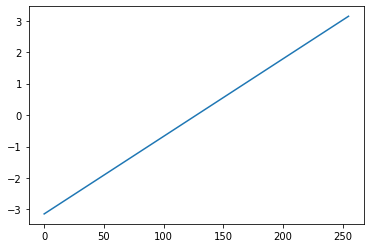

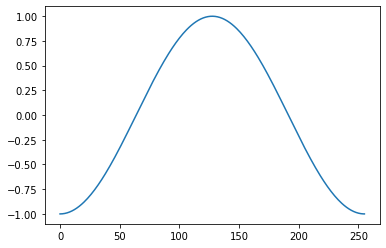

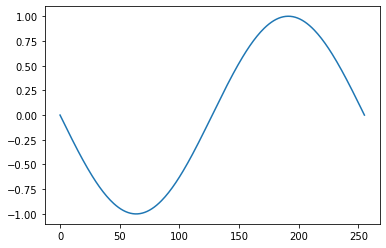

In [6]:
X    = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot( X )
plt.show()
plt.plot( C )
plt.show()
plt.plot( S )
plt.show()

Ako želimo plotati dvije varijable gdje je jedna ovisna o drugoj, kao u
ovom slučaju, gdje je ` X ` nezavisna varijabla a ` C ` i ` S ` su zavisne
varijable, predat ćemo ih funkciji obje kao parametre. Prvo predajemo nezavisnu
varijablu, u ovom slučaju ` X `, te ona ide na $`  x  `$ os, a nakon toga
predajemo zavisnu varijablu ( u ovom slučaju ` C ` i ` S ` ) koja ide na 
$`  y  `$ os.

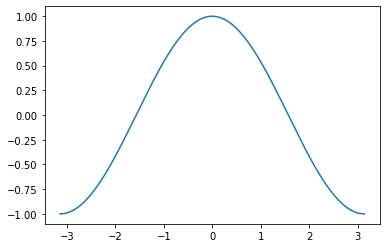

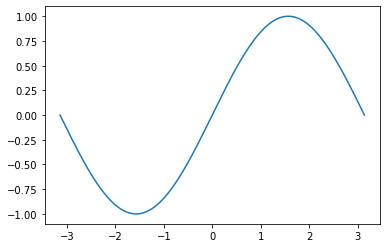

In [7]:
X    = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot( X, C )
plt.show()
plt.plot( X, S )
plt.show()

Ako želimo plotati više od jedne varijable na istom grafu, tada ih dodajemo
s ` plot() ` funkcijom, bez poziva ` plt.show() ` između. Ovaj način je
ekvivalentan ` hold on ` naredbi u MATLAB-u. Poziv funkcije ` plt.show() `
iscrtava trenutni graf na ekran, te se svi novi pozivi ` plt.plot() ` funkcije
izvršavaju na novom grafu, koji se isto prikazuje ponovnim pozivom ` plt.show() ` 
funkcije.

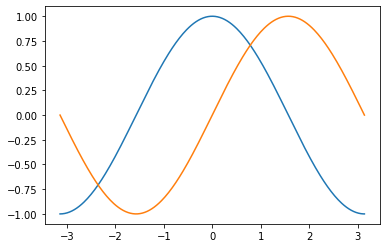

In [8]:
X    = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot( X, C )
plt.plot( X, S )
plt.show()

Moguće je, koristeći sličnu sintaksu kao u MATLAB-u, dodavati nazive na osi,
naslov grafa, mijenjati boje, debljine i oblike linija i slično. Također je
moguće renderirati matematičke formule direktno unutar teksta na grafu, za što
se koristi LaTeX sintaksa. Pogledajte sljedeći primjer.

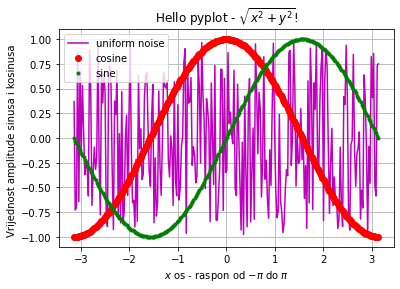

In [9]:
X    = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
R    = np.random.uniform(-1,1,256) #uniformni šum od -1 do 1

plt.plot( X, R, 'm-', label="uniform noise") #boja magenta, linija
plt.plot( X, C, 'ro', label="cosine")        #boja red, krugovi
plt.plot( X, S, 'g.', label="sine" )         #boja green, točkice
plt.xlabel(r"$x$ os - raspon od $-\pi$ do $\pi$ ") 
plt.ylabel(r"Vrijednost amplitude sinusa i kosinusa ") 
plt.title(r"Hello pyplot - $\sqrt{x^2 + y^2}$!")
plt.legend(loc="upper left")
plt.grid()
plt.show()

U gornjem primjeru možemo primijetiti ` r"slovo 'r' ispred stringova" ` u
funkcijama ` xlabel `, ` ylabel ` i  ` title `. Razlog su znakovi ` \ ` 
unutar stringa. slovo ` r ` prije stringa označava da se radi o _ raw _
stringu, te neće _escapeati_ znakove unutar tog stringa. Ti su nam znakovi
potrebni jer matplotlib ima u sebi LaTeX prevoditelj koji prevodi LaTeX
sintaksu u matematičke formule.

#### Vertikalne linije

Čest način prikaza podataka u grafovima osim krivulje je i koristeći vertikalne
linije. Često ga koristimo za kvantitativno prikazivanje podataka po
kategorijama ( koliko ima pripadnika koje kategorije ). Primjer koji se često
koristi je prikaz uspješnosti na ispitima. U tom slučaju imamo 5 vertikalnih
linija koje predstavljaju 5 ocjena, a visina svake vertikalne linije (ili
stupca) predstavlja koliko je ocjena u toj kategoriji. Možemo pogledati
sljedeći primjer.

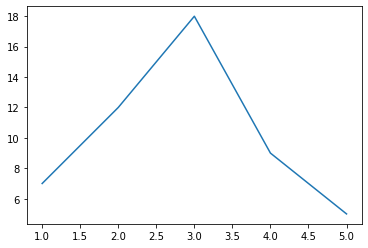

In [10]:
broj_ocjena = [ 7, 12, 18, 9, 5 ]
ocjene = [ 1, 2, 3, 4, 5 ]

plt.plot(ocjene, broj_ocjena)

<BarContainer object of 5 artists>

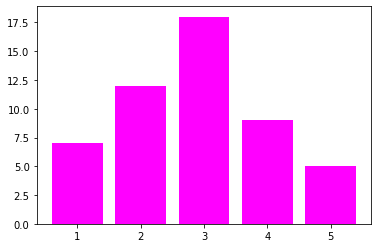

In [11]:
plt.bar(ocjene, broj_ocjena, color='magenta') #moguće je mijenjati boju stupaca

Iz ovog grafa je odmah jasno što su to ocjene i koliko kategorija ocjena ima,
te kojih ocjena ima najviše. Ipak, što ako imamo puno kategorija koje trebamo
prikazati. Primjer je ako želimo prikazati promjenu temperature tijekom dijela
godine,
te imamo 150 dana za koje želimo prikazati temperaturu za svaki pojedini
dan. 

<BarContainer object of 150 artists>

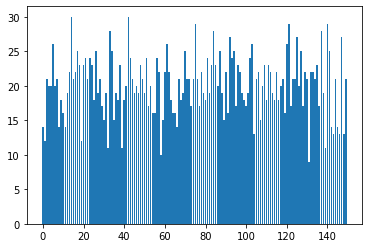

In [12]:
temps = np.random.poisson(20,150) #uzima 150 random vrijednosti iz poissonove distribucije 

plt.bar(np.arange(len(temps)), temps)

U ovakvom slučaju graf ne izgleda baš najljepše, jer matplotlib pokušava oko
svakog stupca ocrtati crnu liniju, a stupac obojati u neku boju (default
plavu).
Za slučaj kada imamo jako puno kategorija koje želimo prikazati, bolji način
je umjesto stupca iscrtavati samo vertikalnu liniju. To možemo korištenjem
funkcije ` plt.vlines() `.

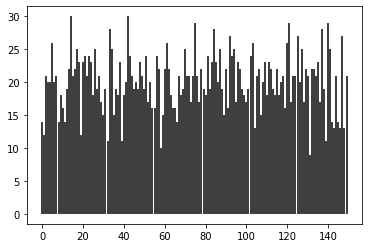

In [13]:
plt.vlines(np.arange(len(temps)), 0 , temps)

U prijašnjem primjeru ` plt.bar() ` funkcija je primala dva parametra, polja
vrijednosti na $`  x  `$ i $`  y  `$ osi. Funkcija ` plt.vlines() ` prima tri
parametra, gdje je prvi kao i kod ` plt.bar() ` polje vrijednosti na $`  x  `$
osi, dok je ovdje drugi parametar minimalna vrijednost linije na $`  y  `$ osi,
a treći vrijednosti na $`  y  `$ osi do kojih treba iscrtati linije.

Isto kao i u dosadašnjim primjerima, i vertikalne linije možemo uređivati,
mijenjati im boju, dodavati tekst, te plotati više različitih tipova plotova na
isti graf.

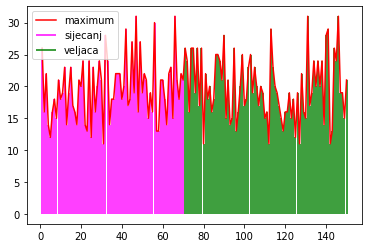

In [14]:
temps = np.random.poisson(20,150)
temps3 = temps.copy()
temps2 = np.zeros_like(temps)
temps2[70:] = temps[70:].copy()
temps[70:] = 0

plt.plot(np.arange(1,len(temps3)+1), temps3, label="maximum", color="red")
plt.vlines(np.arange(1,len(temps)+1),0, temps, label="sijecanj", color="magenta")
plt.vlines(np.arange(1,len(temps2)+1),0, temps2, label="veljaca", color="green")
plt.legend(loc="upper left")
plt.show()

## Noise

Wikipedia: [Image noise]( https://en.wikipedia.org/wiki/Image_noise )

### Gaussian noise

Gaussov šum predstavlja statistički šum u kojem je vjerojatnost pojavljivanja
određene vrijednosti jednaka normalnoj tj. Gaussovoj distribuciji. 

Vjerojatnost pojavljivanja neke slučajne vrijednosti $`  z  `$ dana je s:

![gauss formula](https://upload.wikimedia.org/math/c/7/0/c70012e2b38059f77ba8b6bb4cea7e2c.png)

gdje je $`  z  `$ razina sive boje, $`  \mu  `$ je srednja vrijednost, dok je
$`  \sigma  `$ standardna devijacija.

Gaussova distribucija pri određenim parametrima $`  \mu  `$ i $`  \sigma  `$
je:

![gauss distrib](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/720px-Normal_Distribution_PDF.svg.png)

Više o Gaussovom šumu: 

- [Gaussova distribucija](https://en.wikipedia.org/wiki/Gaussian_distribution)
- [Gaussov šum](https://en.wikipedia.org/wiki/Gaussian_noise)

**Izgled gaussove distribucije možemo dobiti slijedećim kodom:**


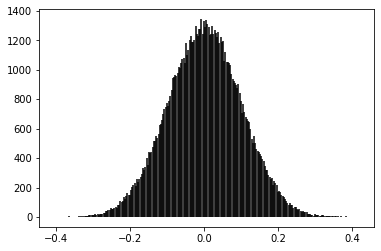

In [15]:
mu = 0
sigma = 0.1
gauss = np.random.normal(mu, sigma, 100000)
hist,bins = np.histogram(gauss, bins=256 )
plt.vlines(bins[1:], 0, hist)

### Uniform noise


Uniformni šum se još naziva i kvantizacijski šum. Nastaje najčešće pri
kvantiziranju piksela ulazne slike na određeni broj dikretnih razina. Ima
otprilike uniformnu razdiobu. To znači da svaka vrijednost unutar nekog raspona
ima jednaku vjerojatnost pojavljivanja.

![uniform_formula](https://upload.wikimedia.org/math/8/f/b/8fbfebfbb3dfa135da807a45374376d5.png)

gdje su $`  a  `$ i $`  b  `$ granice unutar kojih se vrijednost može pojaviti.

Ovako izgleda uniformna razdioba:

![uniform_dist](https://upload.wikimedia.org/wikipedia/commons/9/96/Uniform_Distribution_PDF_SVG.svg)

Više:

- [ Quantization (Uniform) noise ](https://en.wikipedia.org/wiki/Image_noise#Quantization_noise_.28uniform_noise.29) 
- [ Uniform distribution ]( https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29)

### Salt and pepper noise

Salt and pepper šum je oblik šuma gdje je neki postotak slučajnih  piksela na slici ili bijel ili  crn.

![snp](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Noise_salt_and_pepper.png/220px-Noise_salt_and_pepper.png)

## Implementacija šuma 

Slijedeći kod sadrži implementaciju dva tipa šuma.

In [16]:
def gaussian_noise(img, mu, sigma):
  # generiraj nasumicne brojeve Gaussove distribucije
  noise = np.random.normal(mu, sigma, img.shape)
  return noise.astype(np.uint8)

def salt_n_pepper_noise(img, percent=10):
  limit = ((float(percent)/2.0)/100.0) * 255.0
  noise = np.random.uniform(0,255, img.shape)
  return noise.astype(np.uint8)

## Zadatak 1

Učitajte proizvoljnu sliku i dodajte joj Gaussov šum koristeći gore-definiranu funkciju. Prikažite izvornu i sliku s dodanim šumom u istom kodnom bloku. Kod prikaza slike postaviti `imshow` argument `cmap='gray'`. Za svaku sliku postaviti naslov koji odgovara toj slici (Sa šumom / Bez šuma).

Pomoć: Možete koristiti `plt.show()` za prikazivanje trenutnog stanja na ekran i mogućnost crtanja novog grafa.

Text(0.5, 1.0, 'Sa šumom')

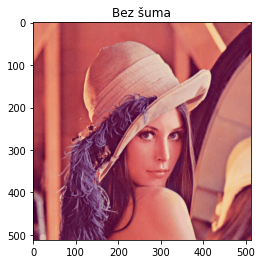

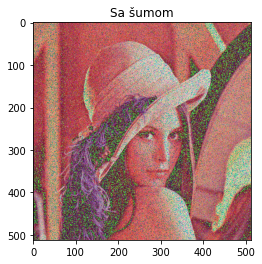

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

pic = cv2.imread('slike/lenna.bmp')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.imshow(pic, cmap='gray')
plt.title("Bez šuma")

plt.figure(2)
gaussianNoisePic = gaussian_noise(pic, 0, 30) + pic
plt.imshow(gaussianNoisePic, cmap='gray')
plt.title("Sa šumom")

## Zadatak 2

Koristeći `plt.hist` funkciju, prikažite histogram izvorne slike kao i slike s dodanim šumom u istom kodnom bloku. Svakom histogramu pridodijeliti naslov. `bins` parametar postavite na maksimalnu vrijednost prikladnu za sliku. Pomoć: Numpy matrice imaju metodu `.flatten()` koja matricu pretvori u 1D niz brojeva.

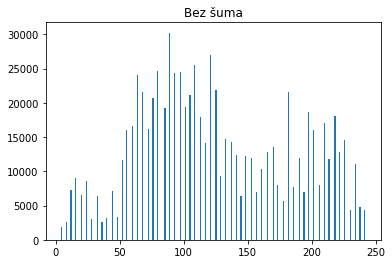

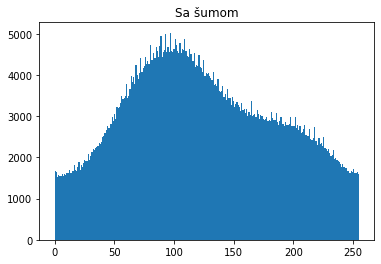

In [18]:
plt.figure(1)
plt.title("Bez šuma")
histogramPic = plt.hist(pic.flatten(), bins=256 )

plt.figure(2)
plt.title("Sa šumom")
histogramPic = plt.hist(gaussianNoisePic.flatten(), bins=256 )

## Zadatak 3

Po uzoru na funkciju `gaussian_noise` i prema gornjoj formuli za uniformni šum implementirajte funkciju koja će vratiti uniformni šum za parametre a i b.

In [19]:
def uniform_noise(img, a, b):
   noise = np.random.uniform(a, b, img.shape)
   return noise.astype(np.uint8)

Prikažite u istom kodnom bloku izvornu sliku, tu istu sliku s Gaussovim šumom i tu istu sliku s uniformnim šumom.

Text(0.5, 1.0, 'Sa uniform šumom')

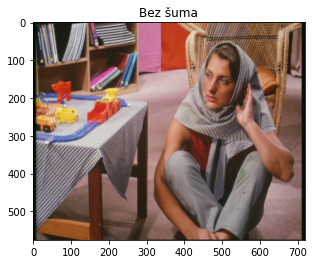

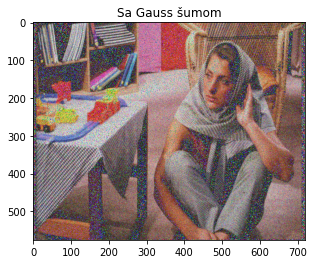

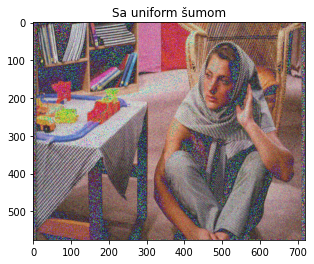

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

pic = cv2.imread('slike/barbara.bmp')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.imshow(pic, cmap='gray')
plt.title("Bez šuma")

plt.figure(2)
gaussianNoisePic = gaussian_noise(pic, 0, 30) + pic
plt.imshow(gaussianNoisePic, cmap='gray')
plt.title("Sa Gauss šumom")

plt.figure(3)
uniformNoisePic = uniform_noise(pic, -50, 50) + pic
plt.imshow(uniformNoisePic, cmap='gray')
plt.title("Sa uniform šumom")

# Median filtering

### Brief Description

The median filter is normally used to reduce noise
in an image, somewhat like the mean  (averaging) filter. However, it often does a
better job than the mean filter of preserving useful detail in the
image.


### How It Works

Like the mean (averaging) filter, the median filter considers each pixel in the
image in turn and looks at its nearby neighbors to decide whether or
not it is representative of its surroundings. Instead of simply
replacing the pixel value with the <EM>mean</EM> of neighboring pixel
values, it replaces it with the <EM>median</EM> of those values. The
median is calculated by first sorting all the pixel values from the
surrounding neighborhood into numerical order and then replacing the
pixel being considered with the middle pixel value.  (If the
neighborhood under consideration contains an even number of pixels,
the average of the two middle pixel values is used.) Following image 
illustrates an example calculation.

<CENTER><IMG ALT="" SRC="http://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/med3x3.gif"></CENTER>

 Calculating the median value of a pixel neighborhood. As
can be seen, the central pixel value of 150 is rather unrepresentative
of the surrounding pixels and is replaced with the median value:
124. A 3&#215;3 square neighborhood is used here --- larger
neighborhoods will produce more severe smoothing.

### Guidelines for Use

<P>By calculating the median value of a neighborhood rather than the
mean value, the median filter has two main advantages over
the mean filter:

- The median is a more robust average than the mean and so a
single very unrepresentative pixel in a neighborhood will not affect
the median value significantly.

- Since the median value must actually be the value of one of the
pixels in the neighborhood, the median filter does not create new
unrealistic pixel values when the filter straddles an edge. For this
reason the median filter is much better at preserving sharp edges than
the mean filter.

You can use median filter with the following code:

```
median = cv2.medianBlur( image, radius )
```

where image is numpy array containing the image, and radius is an integer which
defines the radius of the neighborhood for filtering.

You can use gaussian blur filter with the following code:

```
blur = cv2.GaussianBlur( image, (kernelXsize, kernelYsize), sigma )
```

where image is numpy array containing the image, (kernelXsize, kernelYsize) is
a tuple containing the size of the kernel ( e.g. `(5, 5)` for 5x5 kernel ) and
sigma is the value of $`  \sigma  `$ parameter.

## Zadatak 4

Korumpirajte proizvoljnu sliku salt and pepper šumom od 10%. Obavite median filter na slici i prikažite izvornu i filtiranu sliku. Odokativno odredite najbolje vrijednosti parametara filtera koje će ukloniti šum ali neće previše zamutiti sliku.

Text(0.5, 1.0, 'S filterom')

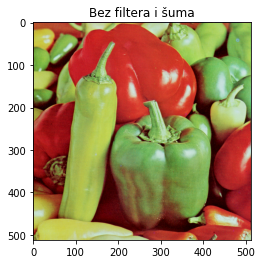

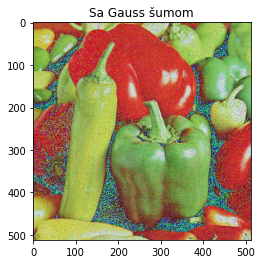

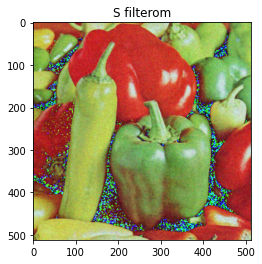

In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

pic = cv2.imread('slike/pepper.bmp')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.imshow(pic, cmap='gray')
plt.title("Bez filtera i šuma")

plt.figure(2)
gaussianNoisePic = gaussian_noise(pic, 0, 20) + pic
plt.imshow(gaussianNoisePic, cmap='gray')
plt.title("Sa Gauss šumom")

radius = 3
median = cv2.medianBlur( gaussianNoisePic, radius )
plt.figure(3)
plt.imshow(median, cmap='gray')
plt.title("S filterom")

Na korumpiranoj slici obavite Gaussov blur i prikažite izvornu i filtriranu sliku. Odokativno odredite najbolje vrijednosti parametara filtera koje će ukloniti šum ali neće previše zamutiti sliku.

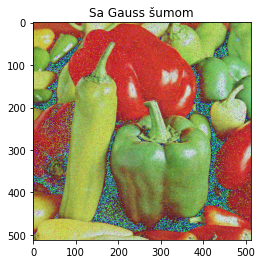

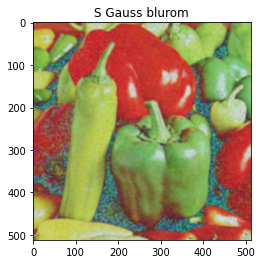

In [22]:
plt.figure(1)
gaussianNoisePic = gaussian_noise(pic, 0, 20) + pic
plt.imshow(gaussianNoisePic, cmap='gray')
plt.title("Sa Gauss šumom")

blur = cv2.GaussianBlur( gaussianNoisePic, (5, 5), 20 )
plt.figure(2)
plt.title("S Gauss blurom")
plt.imshow(blur, cmap='gray')

## Zadatak 5

Korumpirajte proizvoljnu sliku Gaussovim šumom sa sigma = 15. Obavite median filter na slici i prikažite izvornu i filtiranu sliku. Odokativno odredite najbolje vrijednosti parametara filtera koje će ukloniti šum ali neće previše zamutiti sliku.

Text(0.5, 1.0, 'S filterom')

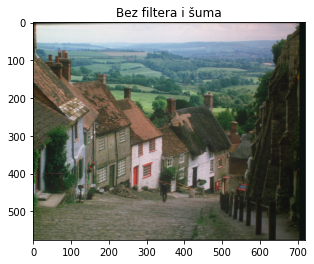

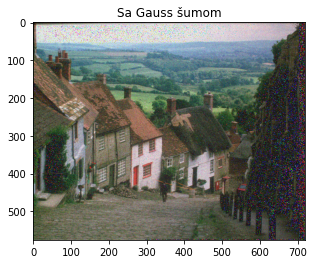

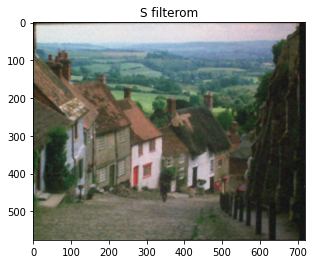

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

pic = cv2.imread('slike/goldhill.bmp')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.imshow(pic, cmap='gray')
plt.title("Bez filtera i šuma")

plt.figure(2)
gaussianNoisePic = gaussian_noise(pic, 0, 15) + pic
plt.imshow(gaussianNoisePic, cmap='gray')
plt.title("Sa Gauss šumom")

radius = 5
median = cv2.medianBlur( gaussianNoisePic, radius )
plt.figure(3)
plt.imshow(median, cmap='gray')
plt.title("S filterom")

Na korumpiranoj slici obavite Gaussov blur i prikažite izvornu i filtriranu sliku. Odokativno odredite najbolje vrijednosti parametara filtera koje će ukloniti šum ali neće previše zamutiti sliku.

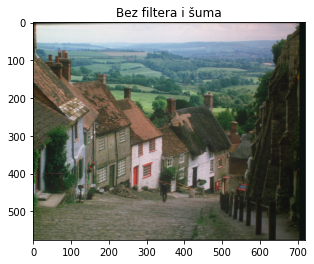

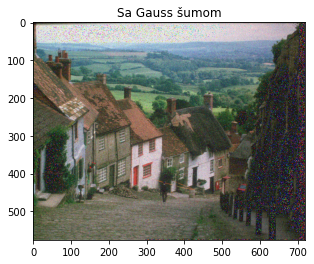

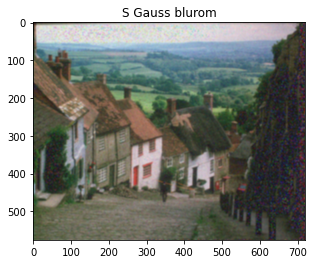

In [24]:
pic = cv2.imread('slike/goldhill.bmp')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.imshow(pic, cmap='gray')
plt.title("Bez filtera i šuma")

plt.figure(2)
gaussianNoisePic = gaussian_noise(pic, 0, 15) + pic
plt.imshow(gaussianNoisePic, cmap='gray')
plt.title("Sa Gauss šumom")

blur = cv2.GaussianBlur( gaussianNoisePic, (5, 5), 20 )
plt.figure(3)
plt.title("S Gauss blurom")
plt.imshow(blur, cmap='gray')

Nemojte zaboraviti spremiti notebook. :)